# Project 3 Modeling

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [81]:
import math
import pickle
import statistics
import numpy as np
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import itertools
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import StackingClassifier 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, auc
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from xgboost import XGBClassifier
from catboost import CatBoostRegressor

In [4]:
df=pd.read_pickle("Data/df.pkl")
df_drop=pd.read_pickle("Data/df_drop.pkl")
df_no_na=pd.read_pickle("Data/df_no_na.pkl")

In [5]:
df_drop = df_drop.reset_index(drop = True)
df_no_na = df_no_na.reset_index(drop = True)

In [211]:
df_save = df.iloc[:,1:] # Without the ID

In [216]:
df_save.to_csv('df_save.csv') 

## Prepare Data

In [6]:
df_train=df_drop.values

X = df_train[:, 2:].astype(str)
y = df_train[:, 1].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)


In [7]:
# Setting up a columns name translator 
X_dummies = df_drop.iloc[:, 2:].astype(str)
X_dummies = pd.get_dummies(X_dummies)

In [9]:
len(X_dummies.columns) # Verify the length from "get_dummies" is the same as "one_hot_encode"

175

In [10]:
len(X_train[0]) 

36

In [11]:
names = list(X_dummies.columns) # Feature reference list for interpretation 

In [12]:
# one-hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)
#ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [13]:
X_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

## RandomForest

In [51]:
model = RandomForestClassifier()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
print("Training: {:6.2f}%".format(100*model.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*model.score(X_test, y_test)))
accuracy = accuracy_score(y_test, yhat)
roc_auc = roc_auc_score(y_test, yhat)
print('Accuracy_: %.2f' % (accuracy*100))
print('roc_auc_score: %.2f' % (roc_auc*100))
print(classification_report(y_test, yhat))

Training: 100.00%
Test set:  85.42%
Accuracy_: 85.42
roc_auc_score: 79.56
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1561
           1       0.81      0.66      0.72       641

    accuracy                           0.85      2202
   macro avg       0.84      0.80      0.81      2202
weighted avg       0.85      0.85      0.85      2202



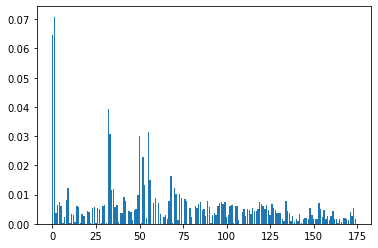

In [52]:
# get importance
importance = model.feature_importances_
# summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance);


In [68]:
indices = np.argsort(importance)[-30:]
indices

array([ 85,  99,   4,  42,  67, 134,  89,  77,   8,  76,  74,  59,  41,
        49,  71,  73,  34,  35,   9,  70,  53,  56,  68,  52,  50,  33,
        55,  32,   0,   1])

In [115]:
feature_raw=[]
for i in indices:
    feature_raw.append(names[i])

In [116]:
feature_raw

['age_group_55 - 64 Years',
 'income_poverty_> $75,000',
 'h1n1_concern_2.0',
 'health_worker_1.0',
 'opinion_seas_vacc_effective_4.0',
 'employment_industry_fcxhlnwr',
 'education_College Graduate',
 'opinion_seas_sick_from_vacc_2.0',
 'h1n1_knowledge_1.0',
 'opinion_seas_sick_from_vacc_1.0',
 'opinion_seas_risk_5.0',
 'opinion_h1n1_sick_from_vacc_2.0',
 'health_worker_0.0',
 'opinion_h1n1_vacc_effective_4.0',
 'opinion_seas_risk_2.0',
 'opinion_seas_risk_4.0',
 'doctor_recc_seasonal_0.0',
 'doctor_recc_seasonal_1.0',
 'h1n1_knowledge_2.0',
 'opinion_seas_risk_1.0',
 'opinion_h1n1_risk_2.0',
 'opinion_h1n1_risk_5.0',
 'opinion_seas_vacc_effective_5.0',
 'opinion_h1n1_risk_1.0',
 'opinion_h1n1_vacc_effective_5.0',
 'doctor_recc_h1n1_1.0',
 'opinion_h1n1_risk_4.0',
 'doctor_recc_h1n1_0.0',
 'seasonal_vaccine_0',
 'seasonal_vaccine_1']

In [131]:
feature_clean=[]
for i in feature_raw:
    if "." in (i.split("_")[-1]):
        feature_clean.append("_".join(i.split("_")[:-1]))
    else:
        feature_clean.append(i)

In [132]:
feature_keep = set(feature_clean)

In [139]:
len(feature_keep)

17

In [140]:
zip_list=list(zip(feature_clean, importance[-30:]))

In [169]:
zip_list

[('age_group_55 - 64 Years', 0.0018459710968270911),
 ('income_poverty_> $75,000', 0.0020599087288576535),
 ('h1n1_concern', 0.0017853189541767842),
 ('health_worker', 0.005403747053501599),
 ('opinion_seas_vacc_effective', 0.0030382179894259797),
 ('employment_industry_fcxhlnwr', 0.0018126966996551356),
 ('education_College Graduate', 0.0015145449309786779),
 ('opinion_seas_sick_from_vacc', 0.0015201488871464974),
 ('h1n1_knowledge', 0.0072727450524772246),
 ('opinion_seas_sick_from_vacc', 0.005096474122892275),
 ('opinion_seas_risk', 0.002261676249823239),
 ('opinion_h1n1_sick_from_vacc', 0.004790131111084453),
 ('health_worker', 0.001615459755866395),
 ('opinion_h1n1_vacc_effective', 0.002508738110761985),
 ('opinion_seas_risk', 0.0013480392000766598),
 ('opinion_seas_risk', 0.002533108920855741),
 ('doctor_recc_seasonal', 0.004382791078920471),
 ('doctor_recc_seasonal', 0.001585181270511172),
 ('h1n1_knowledge', 0.0017842324807938192),
 ('opinion_seas_risk', 0.00035811754769925604)

In [280]:
imp_dict = {('age_group_55 - 64 Years', 0.0018459710968270911),
 ('income_poverty_> $75,000', 0.0020599087288576535),
 ('h1n1_concern', 0.0017853189541767842),
 ('health_worker', 0.005403747053501599),
 ('opinion_seas_vacc_effective', 0.0030382179894259797),
 ('employment_industry_fcxhlnwr', 0.0018126966996551356),
 ('education_College Graduate', 0.0015145449309786779),
 ('opinion_seas_sick_from_vacc', 0.0015201488871464974),
 ('h1n1_knowledge', 0.0072727450524772246),
 ('opinion_seas_sick_from_vacc', 0.005096474122892275),
 ('opinion_seas_risk', 0.002261676249823239),
 ('opinion_h1n1_sick_from_vacc', 0.004790131111084453),
 ('health_worker', 0.001615459755866395),
 ('opinion_h1n1_vacc_effective', 0.002508738110761985),
 ('opinion_seas_risk', 0.0013480392000766598),
 ('opinion_seas_risk', 0.002533108920855741),
 ('doctor_recc_seasonal', 0.004382791078920471),
 ('doctor_recc_seasonal', 0.001585181270511172),
 ('h1n1_knowledge', 0.0017842324807938192),
 ('opinion_seas_risk', 0.00035811754769925604),
 ('opinion_h1n1_risk', 0.0017685203450124659),
 ('opinion_h1n1_risk', 0.0006441837636814123),
 ('opinion_seas_vacc_effective', 0.0018830785900443142),
 ('opinion_h1n1_risk', 0.0021150139811904538),
 ('opinion_h1n1_vacc_effective', 0.0015392781092618119),
 ('doctor_recc_h1n1', 0.0013854223939411608),
 ('opinion_h1n1_risk', 0.004107831501166931),
 ('doctor_recc_h1n1', 0.0027106803624739823),
 ('seasonal_vaccine_0', 0.00544740826312538),
 ('seasonal_vaccine_1', 0.0016819483209400627)}

In [293]:
imp_dict_df = pd.DataFrame(imp_dict)

In [295]:
imp_dict_df.columns = ["Features", "Importance"]

In [298]:
imp_dict_df.to_csv("Data/imp_features.csv", index = False)

In [150]:
len(zip_list)

30

In [200]:
from collections import Counter, defaultdict

imp=defaultdict(float)
for i in zip_list:
    imp[i[0]]+=i[1]


In [201]:
imp_df=pd.Series(imp).sort_values(ascending = False)

In [202]:
imp_df = pd.DataFrame(imp_df)

In [205]:
imp_df.reset_index(inplace=True)

In [212]:
imp_df.rename(columns = {'index':'features', 0:'importance'}, inplace = True)

In [213]:
imp_df

,features,importance
0,h1n1_knowledge,0.009057
1,opinion_h1n1_risk,0.008636
2,health_worker,0.007019
3,opinion_seas_sick_from_vacc,0.006617
4,opinion_seas_risk,0.006501
5,doctor_recc_seasonal,0.005968
6,seasonal_vaccine_0,0.005447
7,opinion_seas_vacc_effective,0.004921
8,opinion_h1n1_sick_from_vacc,0.004790
9,doctor_recc_h1n1,0.004096


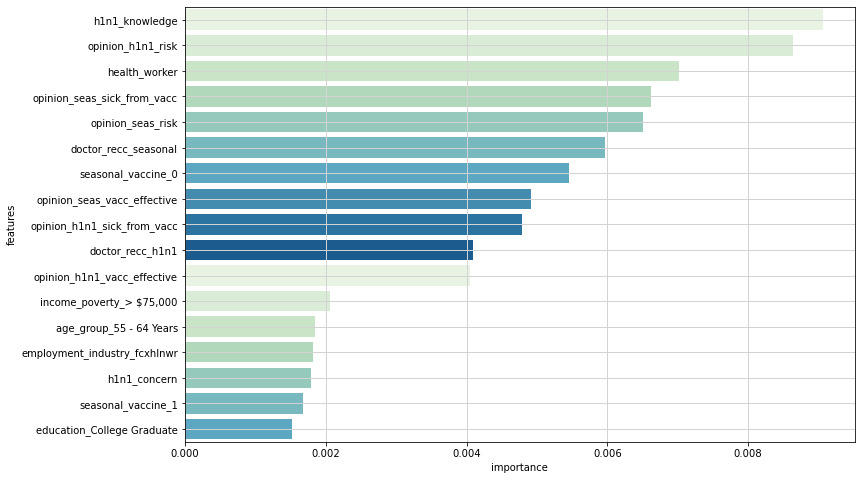

In [219]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='importance', y='features', data=imp_df, palette=sns.color_palette("GnBu", 10))
# plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

## CatBoost

In [217]:
model_cat = CatBoostRegressor()
# fit on the training set
model_cat.fit(X_train, y_train)
# predict on test set
yhat = model_cat.predict(X_test)
# evaluate predictions
print("Training: {:6.2f}%".format(100*model_cat.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*model_cat.score(X_test, y_test)))
accuracy = accuracy_score(y_test, yhat)
roc_auc = roc_auc_score(y_test, yhat)
print('Accuracy_: %.2f' % (accuracy*100))
print('roc_auc_score: %.2f' % (roc_auc*100))
print(classification_report(y_test, yhat))

Learning rate set to 0.064751
0:	learn: 0.4080180	total: 104ms	remaining: 1m 44s
1:	learn: 0.3998695	total: 112ms	remaining: 55.9s
2:	learn: 0.3924745	total: 120ms	remaining: 39.8s
3:	learn: 0.3858070	total: 127ms	remaining: 31.6s
4:	learn: 0.3799702	total: 135ms	remaining: 26.8s
5:	learn: 0.3748260	total: 143ms	remaining: 23.6s
6:	learn: 0.3705012	total: 150ms	remaining: 21.3s
7:	learn: 0.3662194	total: 158ms	remaining: 19.6s
8:	learn: 0.3624458	total: 167ms	remaining: 18.4s
9:	learn: 0.3592650	total: 174ms	remaining: 17.2s
10:	learn: 0.3562589	total: 181ms	remaining: 16.3s
11:	learn: 0.3536671	total: 189ms	remaining: 15.6s
12:	learn: 0.3514061	total: 197ms	remaining: 14.9s
13:	learn: 0.3494695	total: 205ms	remaining: 14.4s
14:	learn: 0.3476687	total: 212ms	remaining: 14s
15:	learn: 0.3458318	total: 220ms	remaining: 13.5s
16:	learn: 0.3442407	total: 228ms	remaining: 13.2s
17:	learn: 0.3428013	total: 237ms	remaining: 12.9s
18:	learn: 0.3416165	total: 252ms	remaining: 13s
19:	learn: 0.3

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [222]:
roc_auc = roc_auc_score(y_test, yhat)
print('roc_auc_score: %.2f' % (roc_auc*100))


roc_auc_score: 90.40


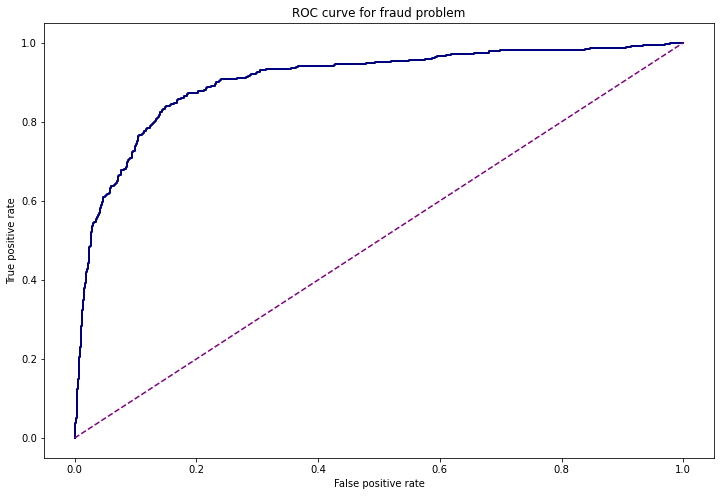

In [238]:
plt.figure(figsize=(12,8))
fpr, tpr, thresholds = roc_curve(y_test, yhat)
plt.plot(fpr, tpr,lw=2,c='navy')
plt.plot([0,1],[0,1],c='purple',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
plt.savefig("Roc_CatBoost.svg")

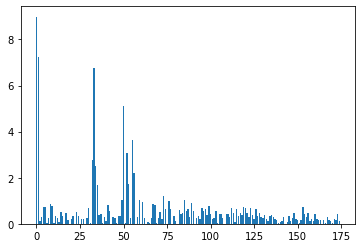

In [223]:
importance = model_cat.get_feature_importance()
plt.bar([x for x in range(len(importance))], importance);

In [224]:
indices = np.argsort(importance)[-30:]

feature_raw=[]
for i in indices:
    feature_raw.append(names[i])

feature_clean=[]
for i in feature_raw:
    if "." in (i.split("_")[-1]):
        feature_clean.append("_".join(i.split("_")[:-1]))b
    else:
        feature_clean.append(i)
        
zip_list=list(zip(feature_clean, importance[-30:]))

imp=defaultdict(float)
for i in zip_list:
    imp[i[0]]+=i[1]
    
imp_df=pd.Series(imp).sort_values(ascending = False)
imp_df = pd.DataFrame(imp_df)
imp_df.reset_index(inplace=True)
imp_df.rename(columns = {'index':'features', 0:'importance'}, inplace = True)

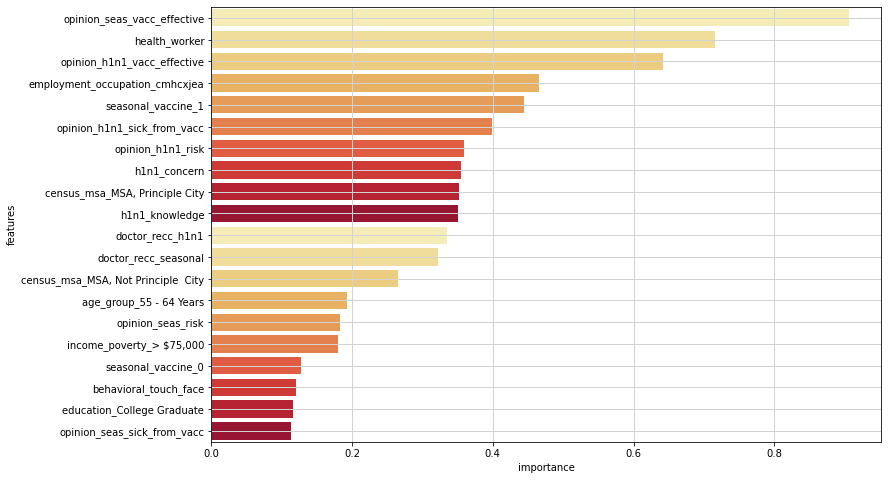

In [230]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='importance', y='features', data=imp_df, palette=sns.color_palette("YlOrRd", 10))
# plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

In [235]:
feature_keep = set(feature_clean)
feature_keep

{'age_group_55 - 64 Years',
 'behavioral_touch_face',
 'census_msa_MSA, Not Principle  City',
 'census_msa_MSA, Principle City',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'education_College Graduate',
 'employment_occupation_cmhcxjea',
 'h1n1_concern',
 'h1n1_knowledge',
 'health_worker',
 'income_poverty_> $75,000',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_h1n1_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'seasonal_vaccine_0',
 'seasonal_vaccine_1'}

## XGBoost

In [299]:
model = XGBClassifier()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
print("Training: {:6.2f}%".format(100*model.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*model.score(X_test, y_test)))
accuracy = accuracy_score(y_test, yhat)
roc_auc = roc_auc_score(y_test, yhat)
print('Accuracy_: %.2f' % (accuracy*100))
print('roc_auc_score: %.2f' % (roc_auc*100))
print(classification_report(y_test, yhat))

Training:  88.00%
Test set:  85.19%
Accuracy_: 85.19
roc_auc_score: 75.25
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      5719
           1       0.71      0.57      0.63      1646

    accuracy                           0.85      7365
   macro avg       0.80      0.75      0.77      7365
weighted avg       0.84      0.85      0.85      7365



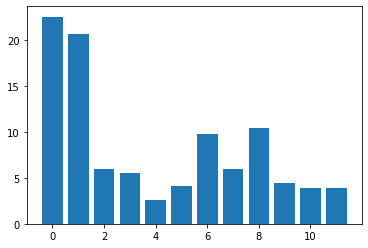

In [300]:
importance = model_cat.get_feature_importance()
plt.bar([x for x in range(len(importance))], importance);

In [302]:
indices = np.argsort(importance)[-30:]

feature_raw=[]
for i in indices:
    feature_raw.append(names[i])

feature_clean=[]
for i in feature_raw:
    if "." in (i.split("_")[-1]):
        feature_clean.append("_".join(i.split("_")[:-1]))
    else:
        feature_clean.append(i)
        
zip_list=list(zip(feature_clean, importance[-30:]))

imp=defaultdict(float)
for i in zip_list:
    imp[i[0]]+=i[1]
    
imp_df=pd.Series(imp).sort_values(ascending = False)
imp_df = pd.DataFrame(imp_df)
imp_df.reset_index(inplace=True)
imp_df.rename(columns = {'index':'features', 0:'importance'}, inplace = True)

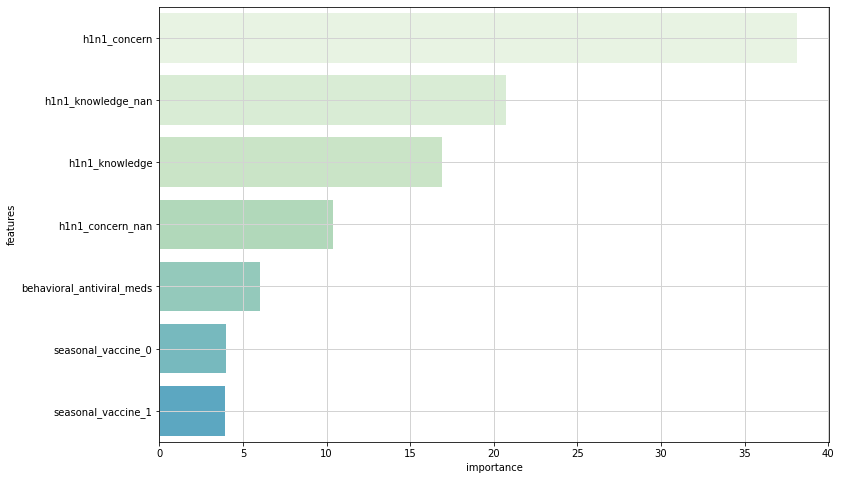

In [303]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='importance', y='features', data=imp_df, palette=sns.color_palette("GnBu", 10))
# plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

## Models Pipeline

In [44]:
# Load pre-trained/tuned models

model_names = ["lr_model", "nb_model", "knn_model", "svc_model", "rf_model", "et_model", "ada_model",'cat_model']

for model_name in model_names:
    with open(f"models/{model_name}.pickle", "rb") as pfile:
        exec(f"{model_name} = pickle.load(pfile)")

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))


In [76]:
# Quick peek at each model performance

for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} score: {curr_model.score(X_test, y_test)}')


lr_model score: 0.8537693006357856
nb_model score: 0.584014532243415
knn_model score: 0.8133514986376021
svc_model score: 0.8542234332425068
rf_model score: 0.8510445049954587
et_model score: 0.849227974568574
ada_model score: 0.8583106267029973
cat_model score: 0.3815981260891006


In [105]:
for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} roc_auc_score: {roc_auc_score(y_test, curr_model.predict(X_test))}')
#     print(f'{model_name} accuracy: {accuracy_score(X_test.reshape(-1,1), y_test)}')

lr_model roc_auc_score: 0.8104329298091846
nb_model roc_auc_score: 0.673957951271286
knn_model roc_auc_score: 0.7616977196704781
svc_model roc_auc_score: 0.8015587631833269
rf_model roc_auc_score: 0.7919610314201165
et_model roc_auc_score: 0.7906798014393349
ada_model roc_auc_score: 0.8136360047611385
cat_model roc_auc_score: 0.8664817444715727


In [106]:
for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} roc_auc_score: {roc_auc_score(y_test, curr_model.predict_proba(X_test)[:,1])}')

lr_model roc_auc_score: 0.9035419712752635
nb_model roc_auc_score: 0.8065337732023052
knn_model roc_auc_score: 0.844565416184873
svc_model roc_auc_score: 0.9032031748918898
rf_model roc_auc_score: 0.9009984999015591
et_model roc_auc_score: 0.9011868866811047
ada_model roc_auc_score: 0.9017300602337995


AttributeError: 'CatBoostRegressor' object has no attribute 'predict_proba'

In [50]:
pal = dict(enumerate(sns.color_palette("GnBu", 2)))
X_train2 = pca.fit_transform(X_train)

## Logistic Regression on Selected Features

In [127]:
select = ['h1n1_vaccine', 'seasonal_vaccine',
          'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'h1n1_concern',
 'h1n1_knowledge',
 'health_worker',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_h1n1_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'opinion_seas_vacc_effective']

In [128]:
df_sel=df[select]

In [129]:
df_sel.shape

(26707, 13)

In [130]:
df_sel.describe()

,h1n1_vaccine,seasonal_vaccine,doctor_recc_h1n1,doctor_recc_seasonal,h1n1_concern,h1n1_knowledge,health_worker,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,opinion_seas_vacc_effective
count,26707.000000,26707.000000,24547.000000,24547.000000,26615.000000,26591.000000,25903.000000,26319.000000,26312.000000,26316.000000,26193.000000,26170.000000,26245.000000
mean,0.212454,0.465608,0.220312,0.329735,1.618486,1.262532,0.111918,2.342566,2.357670,3.850623,2.719162,2.118112,4.025986
std,0.409052,0.498825,0.414466,0.470126,0.910311,0.618149,0.315271,1.285539,1.362766,1.007436,1.385055,1.332950,1.086565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,2.000000,1.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000,2.000000,4.000000,2.000000,2.000000,4.000000
75%,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [131]:
df_sel.isna().sum()

h1n1_vaccine                      0
seasonal_vaccine                  0
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
h1n1_concern                     92
h1n1_knowledge                  116
health_worker                   804
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_h1n1_vacc_effective     391
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
opinion_seas_vacc_effective     462
dtype: int64

In [132]:
df_lr=df_sel.dropna(subset=["doctor_recc_h1n1"])

In [133]:
df_lr.isna().sum()

h1n1_vaccine                     0
seasonal_vaccine                 0
doctor_recc_h1n1                 0
doctor_recc_seasonal             0
h1n1_concern                    73
h1n1_knowledge                 104
health_worker                  619
opinion_h1n1_risk              224
opinion_h1n1_sick_from_vacc    236
opinion_h1n1_vacc_effective    230
opinion_seas_risk              345
opinion_seas_sick_from_vacc    370
opinion_seas_vacc_effective    297
dtype: int64

In [134]:
df_lr.dtypes

h1n1_vaccine                     int64
seasonal_vaccine                 int64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
h1n1_concern                   float64
h1n1_knowledge                 float64
health_worker                  float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_h1n1_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
dtype: object

In [138]:
y=df_lr.iloc[:,0]

In [140]:
y.value_counts()

0    19058
1     5489
Name: h1n1_vaccine, dtype: int64

### MICE Imputation

In [122]:
from fancyimpute import IterativeImputer 

In [145]:
mice_imputer = IterativeImputer() 
X = mice_imputer.fit_transform(df_lr.iloc[:,1:]) 

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)


### Classification Report and Confusion Matrix

In [227]:
df_lr

,h1n1_vaccine,seasonal_vaccine,doctor_recc_h1n1,doctor_recc_seasonal,h1n1_concern,h1n1_knowledge,health_worker,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,opinion_seas_vacc_effective
0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,1.0,2.0,2.0
1,0,1,0.0,0.0,3.0,2.0,0.0,4.0,4.0,5.0,2.0,4.0,4.0
3,0,1,0.0,1.0,1.0,1.0,0.0,3.0,5.0,3.0,4.0,1.0,5.0
4,0,0,0.0,0.0,2.0,1.0,0.0,3.0,2.0,3.0,1.0,4.0,3.0
5,0,0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,5.0,4.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0,0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0,5.0
26703,0,0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,4.0,1.0,1.0,5.0
26704,0,1,0.0,0.0,2.0,2.0,0.0,4.0,2.0,4.0,4.0,2.0,5.0
26705,0,0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,3.0,1.0,2.0,2.0


In [151]:
lr_model = LogisticRegression(solver="lbfgs")
lr_model.fit(X_train, y_train)
# predict on test set
yhat = lr_model.predict(X_test)
# evaluate predictions
print("Training: {:6.2f}%".format(100*lr_model.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*lr_model.score(X_test, y_test)))
accuracy = accuracy_score(y_test, yhat)
roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])
print('Accuracy_: %.2f' % (accuracy*100))
print('roc_auc_score: %.2f' % (roc_auc*100))
print(classification_report(y_test, yhat))

Training:  84.43%
Test set:  85.25%
Accuracy_: 85.25
roc_auc_score: 88.11
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5719
           1       0.73      0.55      0.62      1646

    accuracy                           0.85      7365
   macro avg       0.80      0.74      0.77      7365
weighted avg       0.84      0.85      0.84      7365



In [354]:
def make_confusion_matrix(model, threshold=0.6):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
   
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(confusion, cmap=plt.cm.Reds, annot=True, square=True, fmt='d',
           xticklabels=['Take Vaccine', 'Not Take Vaccine'],
           yticklabels=['Take Vaccine', 'Not Take Vaccine']);
    plt.xlabel('prediction')
    plt.ylabel('actual');


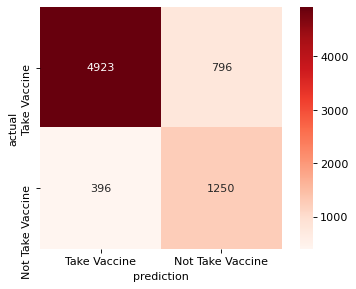

In [201]:
make_confusion_matrix(lr_model);

In [192]:
lr_model.predict_proba(X_test)[:,1]

array([0.13029188, 0.26684702, 0.09858978, ..., 0.49397668, 0.22401546,
       0.0533654 ])

In [305]:
lr_model.coef_

array([[ 1.9715433 ,  2.16502768, -0.96553423, -0.14485422,  0.06348789,
         0.54119514,  0.38042418, -0.0089533 ,  0.65047906, -0.0300498 ,
        -0.03827215, -0.08272063]])

In [228]:
select[1:]

['seasonal_vaccine',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'h1n1_concern',
 'h1n1_knowledge',
 'health_worker',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_h1n1_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'opinion_seas_vacc_effective']

In [229]:
list(zip(select[1:], lr_model.coef_[0]))

[('seasonal_vaccine', 1.994603648426964),
 ('doctor_recc_h1n1', 2.221215880625276),
 ('doctor_recc_seasonal', -1.0529970588122486),
 ('h1n1_concern', -0.08436955386268696),
 ('h1n1_knowledge', 0.039013202286953534),
 ('health_worker', 0.49809820062037524),
 ('opinion_h1n1_risk', 0.36705834085549743),
 ('opinion_h1n1_sick_from_vacc', -0.005149009745327946),
 ('opinion_h1n1_vacc_effective', 0.6255080949515864),
 ('opinion_seas_risk', -0.008981373646964863),
 ('opinion_seas_sick_from_vacc', -0.05182779461435615),
 ('opinion_seas_vacc_effective', -0.09867030268637103)]

In [272]:
feature_coef=pd.DataFrame(zip(select[1:], lr_model.coef_[0]))

In [273]:
feature_coef.columns = ["Feature","Coefficient"]

In [341]:
feature_coef.to_csv("feature_coef.csv", index=False)


In [275]:
feature_coef.to_csv("Data/lr_features.csv", index= False)

In [202]:
final_model = LogisticRegression(max_iter=1000, solver="saga")

X_oversampled_train, y_oversampled_train = RandomOverSampler(random_state=0).fit_sample(X_train, y_train)

final_model.fit(X_oversampled_train, np.array(y_oversampled_train).ravel())
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      5719
           1       0.53      0.83      0.65      1646

    accuracy                           0.80      7365
   macro avg       0.74      0.81      0.75      7365
weighted avg       0.85      0.80      0.81      7365



In [203]:
final_model.coef_

array([[ 1.99453922,  2.22135133, -1.05302193, -0.08449893,  0.03924903,
         0.49816263,  0.36720353, -0.00513484,  0.62556286, -0.00902012,
        -0.05172694, -0.0984812 ]])

In [205]:
print("Training: {:6.2f}%".format(100*final_model.score(X_oversampled_train, y_oversampled_train)))
print("Test set: {:6.2f}%".format(100*final_model.score(X_test, y_pred)))

Training:  79.16%
Test set: 100.00%


## Predict H1N1 Vaccine with 12 features

In [242]:
X_try = pd.DataFrame({'seasonal_vaccine': 1,
                      'doctor_recc_h1n1': 1,
 'doctor_recc_seasonal': 1,
 'h1n1_concern': 3,
 'h1n1_knowledge': 2,
 'health_worker': 0,
 'opinion_h1n1_risk': 5,
 'opinion_h1n1_sick_from_vacc': 4,
 'opinion_h1n1_vacc_effective': 5,
 'opinion_seas_risk': 1,
 'opinion_seas_vacc_effective': 3,
 'opinion_seas_sick_from_vacc': 1}, index = range(1))

In [240]:
X_try.columns

Index(['seasonal_vaccine', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'h1n1_concern', 'h1n1_knowledge', 'health_worker', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_h1n1_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_vacc_effective',
       'opinion_seas_sick_from_vacc'],
      dtype='object')

In [246]:
lr_model.predict_proba(X_try)[0][1]

0.9623989763698817

In [255]:
example_data = df_drop[select[1:]].iloc[:100]

In [256]:
example_data.to_csv('Data/example_data.csv', index = False)

In [257]:
 with open("Data/lr_model.pickle", "wb") as pfile:
        pickle.dump(lr_model, pfile)

In [258]:
    with open("Data/lr_model.pickle", "rb") as pfile:
        exec("lr_model_2 = pickle.load(pfile)")
#https://github.com/vanessa920/H1N1_seasonal_flu_shot_prediction/blob/eda/Data/lr_model.pickle

In [259]:
lr_model_2.predict_proba(X_try)

array([[0.03760102, 0.96239898]])

In [261]:
 df_drop[select].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7338 entries, 0 to 7337
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_vaccine                 7338 non-null   int64  
 1   seasonal_vaccine             7338 non-null   int64  
 2   doctor_recc_h1n1             7338 non-null   float64
 3   doctor_recc_seasonal         7338 non-null   float64
 4   h1n1_concern                 7327 non-null   float64
 5   h1n1_knowledge               7313 non-null   float64
 6   health_worker                7332 non-null   float64
 7   opinion_h1n1_risk            7330 non-null   float64
 8   opinion_h1n1_sick_from_vacc  7336 non-null   float64
 9   opinion_h1n1_vacc_effective  7318 non-null   float64
 10  opinion_seas_risk            7332 non-null   float64
 11  opinion_seas_sick_from_vacc  7336 non-null   float64
 12  opinion_seas_vacc_effective  7325 non-null   float64
dtypes: float64(11), in

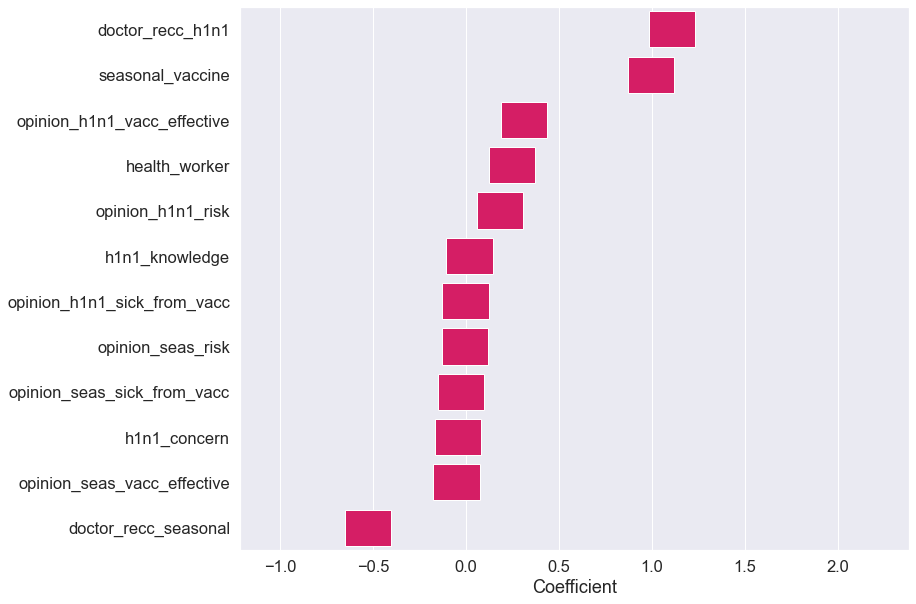

In [350]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12,10))
ax = sns.barplot(x='Coefficient', y='Feature', data=feature_coef, 
                 color = "#F3005E", order=feature_coef.sort_values('Coefficient', ascending = False).Feature)
ax.set(ylabel=None)
#ax.grid(False)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .25);
plt.savefig("Feature_Coeffient.jpg", bbox_inches='tight')

In [380]:
plt.figure(figsize=(12,10))

sns.set(font_scale=1)

def make_confusion_matrix(model, threshold=0.3):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(confusion, cmap=plt.cm.YlOrRd, annot=True, square=True, fmt='d',
           xticklabels=['Take Vaccine', 'Not Take Vaccine'],
           yticklabels=['Take Vaccine', 'Not Take Vaccine']);
    plt.xlabel('prediction')
    plt.ylabel('actual');

<Figure size 864x720 with 0 Axes>

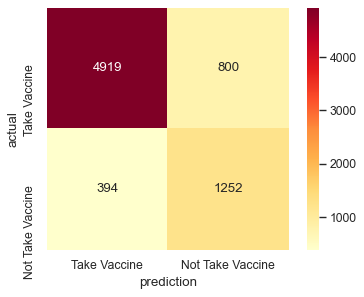

In [382]:
make_confusion_matrix(lr_model);
plt.savefig("ClassBalance.jpg", bbox_inches='tight')